# **빅데이터개론 10주차 실습**
- - -
실습관련 질문 : jjbblue12@hallym.ac.kr (전준범 조교 공학관 1314호 데이터베이스 연구실 )

실습 영상은 Google Colaboratory을 이용하여 진행.

notebook 파일 제공 예정
## **- 다중 선형 회귀분석**
- - -

참고자료 : https://www.notion.so/1e83a70a95474931beb46e23b8289b70




### **<다중선형회귀분석>**

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99A0813C5E1D430625C52A" width="500" height="300">

* **Multiple linear regression (다중회귀분석)**

  : 다중회귀분석은 설명변수(독립변수)가 2개 이상인 회귀분석

  : 다중회귀분석에서 설명변수 개수가 많을 경우, 적절한 회귀모형 선택이 필요함

  : 회귀모형에 포함되는 설명변수의 선정 기준
      ㄱ) 반응변수(종속변수)와 높은 상관관계
      ㄴ) 선택된 설명변수들은 서로 낮은 상관관계를 보임(다중공선성 문제)
      ㄷ) 설명변수의 개수는 적을수록 유리

      * 다중공선성 관련 링크 : https://learnx.tistory.com/entry/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1Multicollinearity%EC%9D%B4%EB%9E%80

<br>

* **Feature selection (변수 선택법)**

  1) All possible regressions

  - 변수들의 가능한 모든 조합들로부터 최적의 모형을 찾아냄

  - 유의한 변수가 누락되지 않는 안전한 방법

  - 변수가 많을수록 탐색 시간이 급증함

  2) Forward stepwise selection (Forward selection)

  - 기여도가 높은 유의한 변수부터 하나씩 추가하는 기법

  - 빠른 계산이 장점

  - 이미 선택된 변수는 다시 제거되지 않음

  3) Backward stepwise selection (Backward elimination)

  - 모든 변수를 포함한 상태에서 불필요한 변수를 제거해나가는 방법

  - 중요한 변수가 제외될 가능성이 매우 적음

  - 이미 제외된 변수는 다시 선택되지 않음
  
  <br>

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F999339425E1D4A5626C373" width="600" height="500">

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F993971425E1D4A572FB764" width="600" height="500">


In [9]:
install.packages(c("tidyverse", "data.table", "devtools", "scatterplot3d", "plotly","PerformanceAnalytics"))
library(tidyverse)
library(data.table)
library(devtools)
options(repr.plot.width=13, repr.plot.height=13)

Installing packages into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)

also installing the dependencies 'later', 'htmlwidgets', 'lazyeval', 'crosstalk', 'promises', 'xts', 'quadprog', 'zoo'


Loading required package: usethis



- - -

#### **A. 예제 1**

https://github.com/kassambara/datarium

In [ ]:
install_github("kassambara/datarium")
library(datarium)

Skipping install of 'datarium' from a github remote, the SHA1 (f65be1d5) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
data("marketing", package = "datarium")
marketing %>% as_tibble() %>% show()

# A tibble: 200 × 4
   youtube facebook newspaper sales
     <dbl>    <dbl>     <dbl> <dbl>
 1   276.     45.4       83.0 26.5 
 2    53.4    47.2       54.1 12.5 
 3    20.6    55.1       83.2 11.2 
 4   182.     49.6       70.2 22.2 
 5   217.     13.0       70.1 15.5 
 6    10.4    58.7       90    8.64
 7    69      39.4       28.2 14.2 
 8   144.     23.5       13.9 15.8 
 9    10.3     2.52       1.2  5.76
10   240.      3.12      25.4 12.7 
# … with 190 more rows


In [ ]:
str(marketing)

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


* boxplot

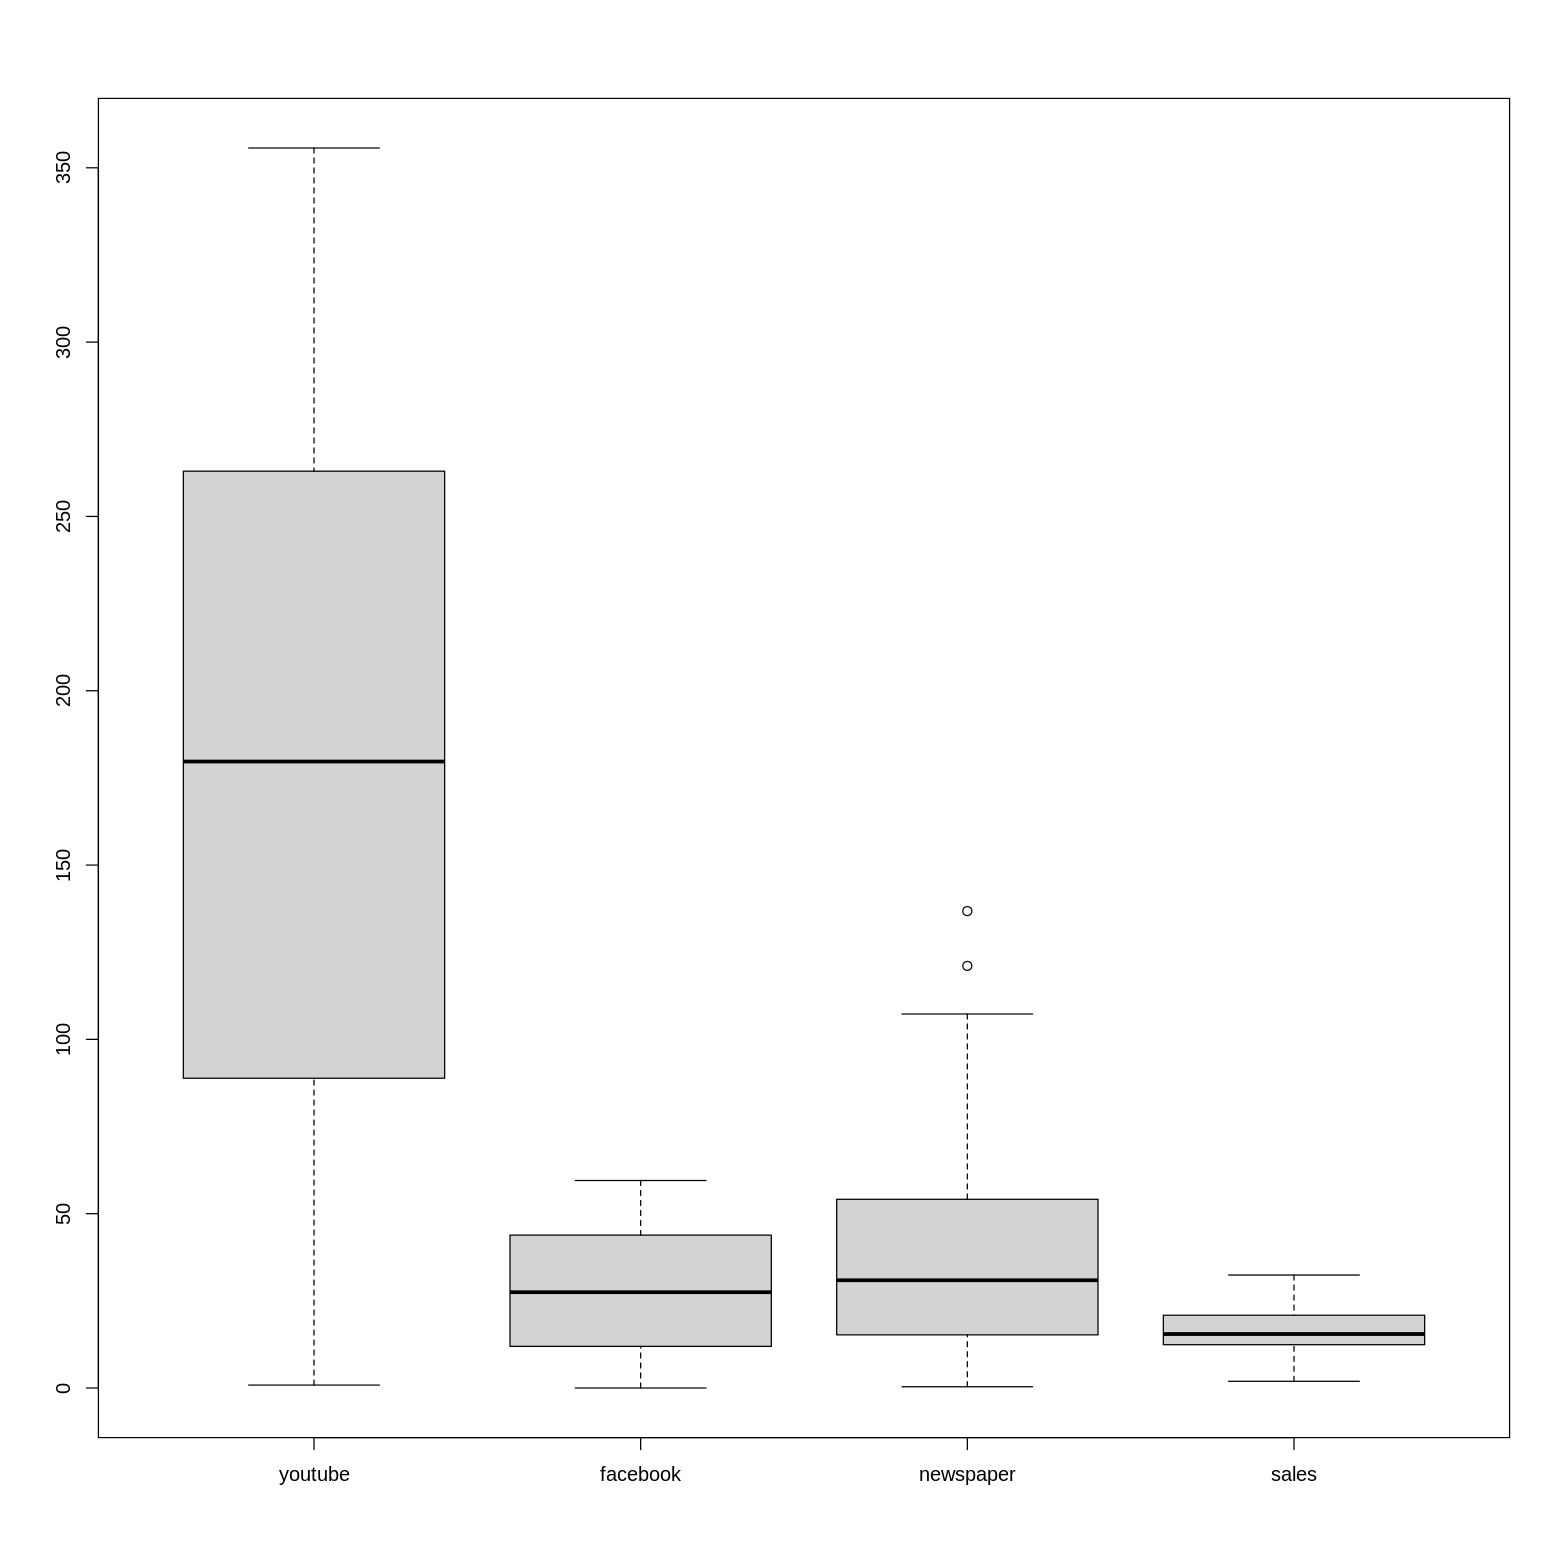

In [ ]:
# boxplot을 이용한 outlier 확인 및 제거(?)
boxplot(marketing)

In [ ]:
str(boxplot(marketing, plot = F))

List of 6
 $ stats: num [1:5, 1:4] 0.84 88.86 179.7 262.98 355.68 ...
 $ n    : num [1:4] 200 200 200 200
 $ conf : num [1:2, 1:4] 160.2 199.2 23.9 31 26.6 ...
 $ out  : num [1:2] 137 121
 $ group: num [1:2] 3 3
 $ names: chr [1:4] "youtube" "facebook" "newspaper" "sales"


* scatter plot

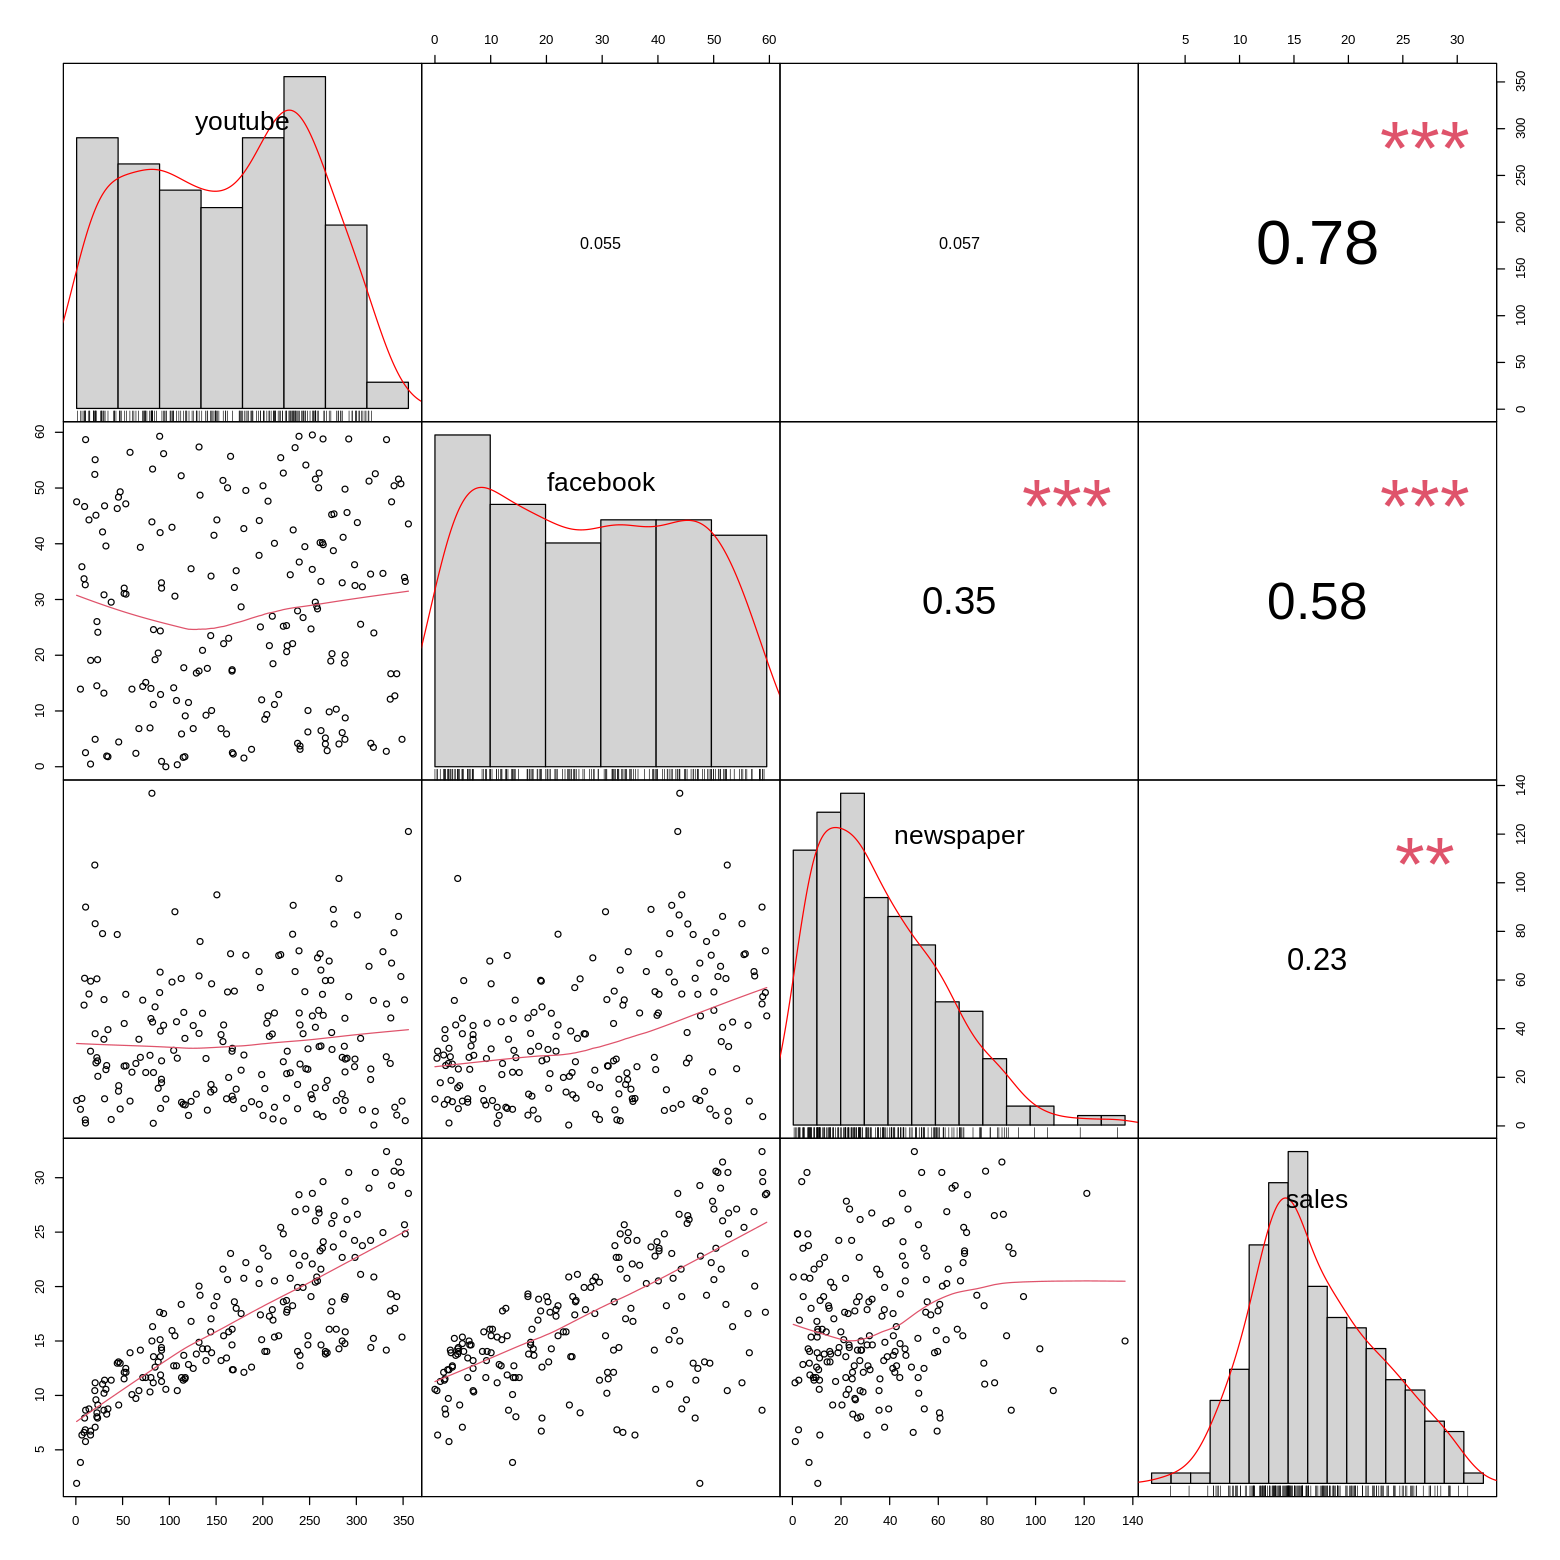

In [ ]:
library(PerformanceAnalytics)
chart.Correlation(marketing, histogram=TRUE, pch=19)

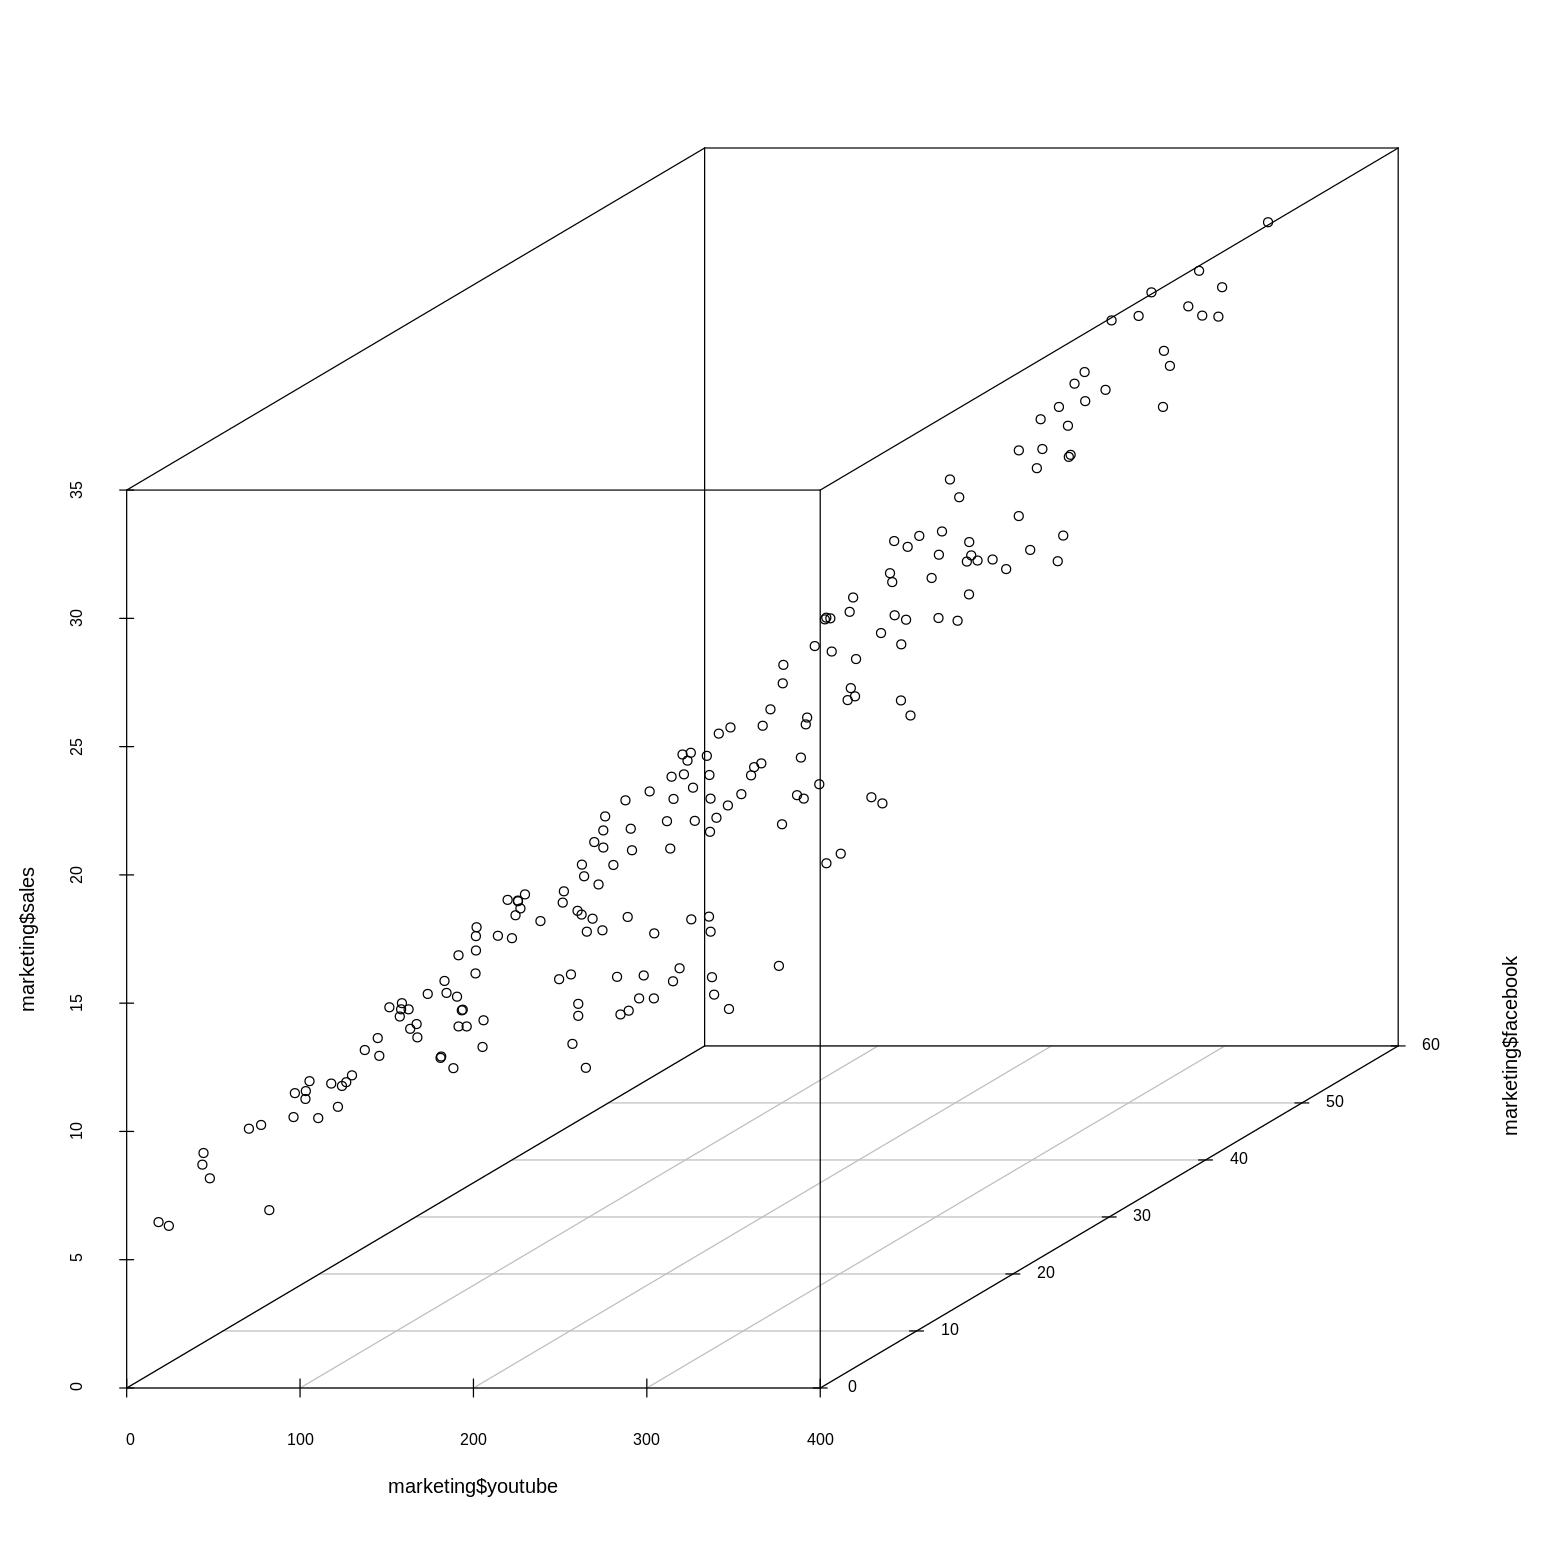

In [ ]:
library(scatterplot3d)
scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, angle = 40)

* **회귀식 추정**
``sales = b0 + b1 * youtube + b2 * facebook + b3 * newspaper ``


In [ ]:
model <- lm(sales ~ youtube + facebook + newspaper, data = marketing)
model


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = marketing)

Coefficients:
(Intercept)      youtube     facebook    newspaper  
   3.526667     0.045765     0.188530    -0.001037  


* 회귀식 도출
* ```
b0 = 3.52667, b1 = 0.045765, b2 = 0.188530, b3 = -0.001037 으로부터 
sales = 3.52667 + 0.045765 * youtube + 0.188530 * facebook + -0.001037 * newspaper
```


* youtube, facebook, newspaper이 각각 1 증가할 때, sales가 0.045765, 0.188530, -0.001037이 증가

In [ ]:
summary(model)


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5932  -1.0690   0.2902   1.4272   3.3951 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.526667   0.374290   9.422   <2e-16 ***
youtube      0.045765   0.001395  32.809   <2e-16 ***
facebook     0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.023 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


<결과의 해석>
```
** m1 모델 **
1. 제일 밑에 F-statistic의 p-value 값은 2.2e-16 로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

2. 중간의 Coefficients:에는 y절편 값(Intercept) 및 변수들의 p-value 값이 나와있다. 
newspaper 변수의 경우 0.86으로 0.05보다 크기에 sales를 설명하는데 유의하지 않다.

3. 밑 부분의 Adjusted R-squared 값은 0.8956로, 89%만큼의 설명력을 가진다고 판단할 수 있다.
```

**<유의하지 않은 변수 제거>**

  * 위 다중회귀분석 결과에서 newspaper 변수가 유의하지 않은 것으로 확인됨

  * 아래의 3가지 방법 중 하나로, 유의하지 않은 변수를 제거할 수 있음

```
1) 유의하지 않은 변수를 누락하고 회귀모형을 새롭게 정의
model_2 <- lm(sales ~ youtube + facebook, data = marketing)

2) update 함수를 사용하여, 기존 회귀모형에서 유의하지 않은 변수 제거
model_2 <- update(model, .~. -newspaper)

3) step 함수를 사용하여, 기존 회귀모형에서 유의하지 않은 변수를 제거해나감
model_2 <- step(model, direction = "backward")
```

In [ ]:
# 1 번 방법
lm(sales ~ youtube + facebook, data = marketing)


Call:
lm(formula = sales ~ youtube + facebook, data = marketing)

Coefficients:
(Intercept)      youtube     facebook  
    3.50532      0.04575      0.18799  


In [ ]:
# 2 번 방법(update 사용)
update(model, .~. -newspaper)


Call:
lm(formula = sales ~ youtube + facebook, data = marketing)

Coefficients:
(Intercept)      youtube     facebook  
    3.50532      0.04575      0.18799  


In [ ]:
# 3 번 방법(step)
step(model, direction = "backward")

Start:  AIC=285.72
sales ~ youtube + facebook + newspaper

            Df Sum of Sq    RSS    AIC
- newspaper  1       0.1  802.0 283.75
<none>                    801.8 285.72
- facebook   1    1960.9 2762.7 531.13
- youtube    1    4403.5 5205.4 657.83

Step:  AIC=283.75
sales ~ youtube + facebook

           Df Sum of Sq    RSS    AIC
<none>                   802.0 283.75
- facebook  1    2225.7 3027.6 547.44
- youtube   1    4408.7 5210.6 656.03



Call:
lm(formula = sales ~ youtube + facebook, data = marketing)

Coefficients:
(Intercept)      youtube     facebook  
    3.50532      0.04575      0.18799  


In [27]:
# 변수의 상대적 중요도 파악
# https://rpubs.com/cardiomoon/152770
factor2number=function(df){
    select=sapply(df,function(x) {is.factor(x)})
    if(sum(select)==1) df[[which(select)]]<-as.numeric(df[[which(select)]])
    else if(sum(select)>1) df[,select]<-lapply(df[,select],as.numeric)
    df
}

chr2factor=function(df){
    select=sapply(df,function(x) {is.character(x)})
    df[,select]<-lapply(df[,select],factor)
    df
}

relweights <- function(fit,plot=FALSE,...){
    df<-fit$model
    df1<-chr2factor(df)
    df2<-factor2number(df1)
    
    R <- cor(df2)
    nvar <- ncol(R)
    rxx <- R[2:nvar, 2:nvar]
    rxy <- R[2:nvar, 1]
    svd <- eigen(rxx)
    evec <- svd$vectors
    ev <- svd$values
    delta <- diag(sqrt(ev))
    lambda <- evec %*% delta %*% t(evec)
    lambdasq <- lambda ^ 2
    beta <- solve(lambda) %*% rxy
    rsquare <- colSums(beta ^ 2)
    rawwgt <- lambdasq %*% beta ^ 2
    import <- (rawwgt / rsquare) * 100
    import <- as.data.frame(import)
    row.names(import) <- names(fit$model[2:nvar])
    names(import) <- "Weights"
    import <- import[order(import),1, drop=FALSE]
    if(plot) {
        dotchart(import$Weights, labels=row.names(import),
                 xlab="% of R-Square", pch=19,
                 main="Relative Importance of Predictor Variables",
                 sub=paste("Total R-Square=", round(rsquare, digits=3)),
                 ...)
    }  
    attr(import,"R-square")<-round(rsquare, digits=3)
    return(import)
}

plotRelWeights=function(fit){
       data<-relweights(fit)
       data$Predictors<-rownames(data)
       p<-ggplot(data=data,aes(x=reorder(Predictors,Weights),y=Weights,fill=Predictors))+ 
           geom_bar(stat="identity",width=0.5)+
           ggtitle("Relative Importance of Predictor Variables")+
           ylab(paste0("% of R-square \n(Total R-Square=",attr(data,"R-square"),")"))+
           geom_text(aes(y=Weights-0.1,label=paste(round(Weights,1),"%")),hjust=1)+
           guides(fill=FALSE)+
           coord_flip()
       p
   }



Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


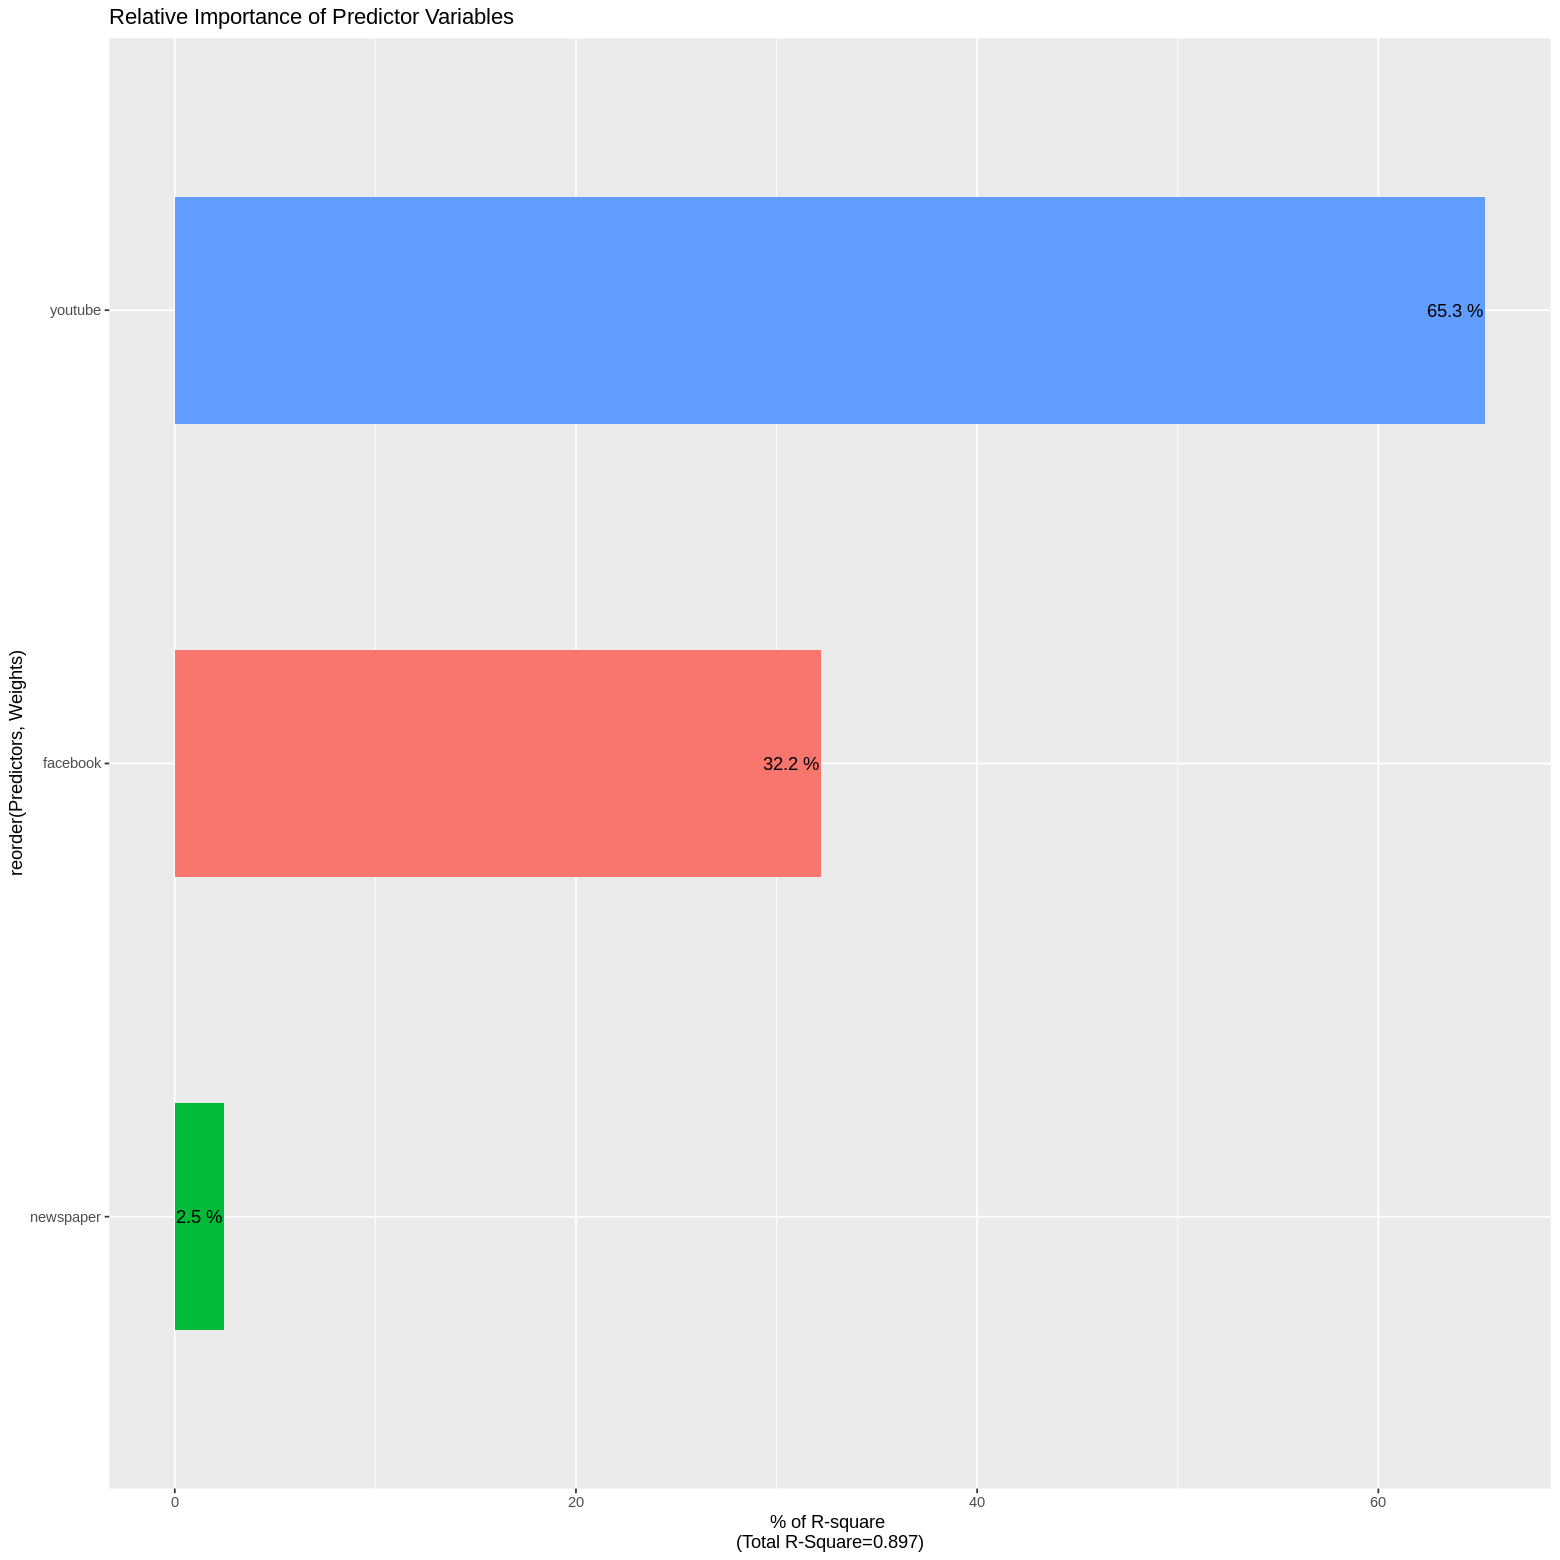

In [ ]:
plotRelWeights(model)

Start:  AIC=285.72
sales ~ youtube + facebook + newspaper

            Df Sum of Sq    RSS    AIC
- newspaper  1       0.1  802.0 283.75
<none>                    801.8 285.72
- facebook   1    1960.9 2762.7 531.13
- youtube    1    4403.5 5205.4 657.83

Step:  AIC=283.75
sales ~ youtube + facebook

           Df Sum of Sq    RSS    AIC
<none>                   802.0 283.75
- facebook  1    2225.7 3027.6 547.44
- youtube   1    4408.7 5210.6 656.03


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


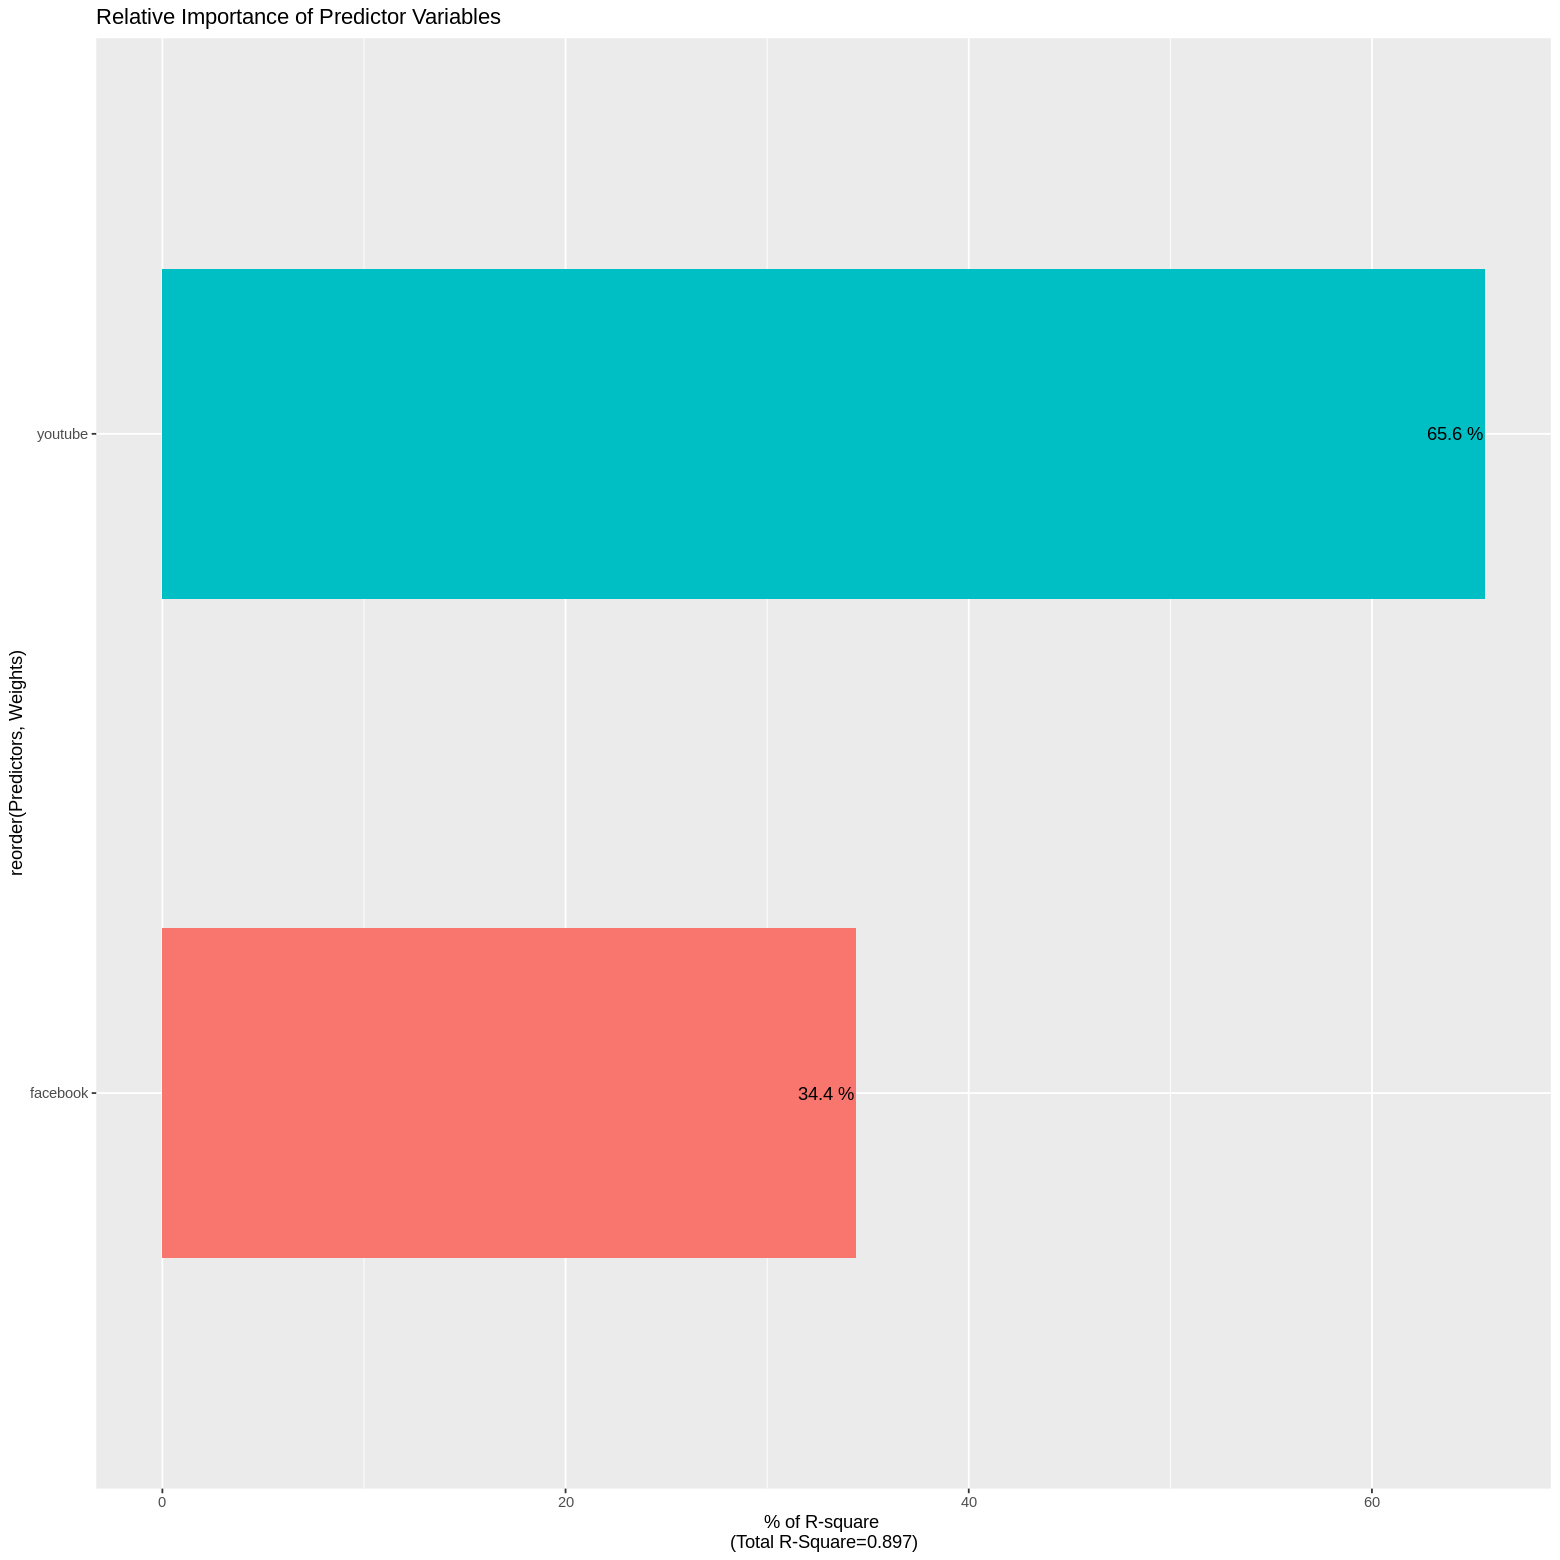

In [ ]:
model_2 <- step(model, direction = "backward")
plotRelWeights(model_2)

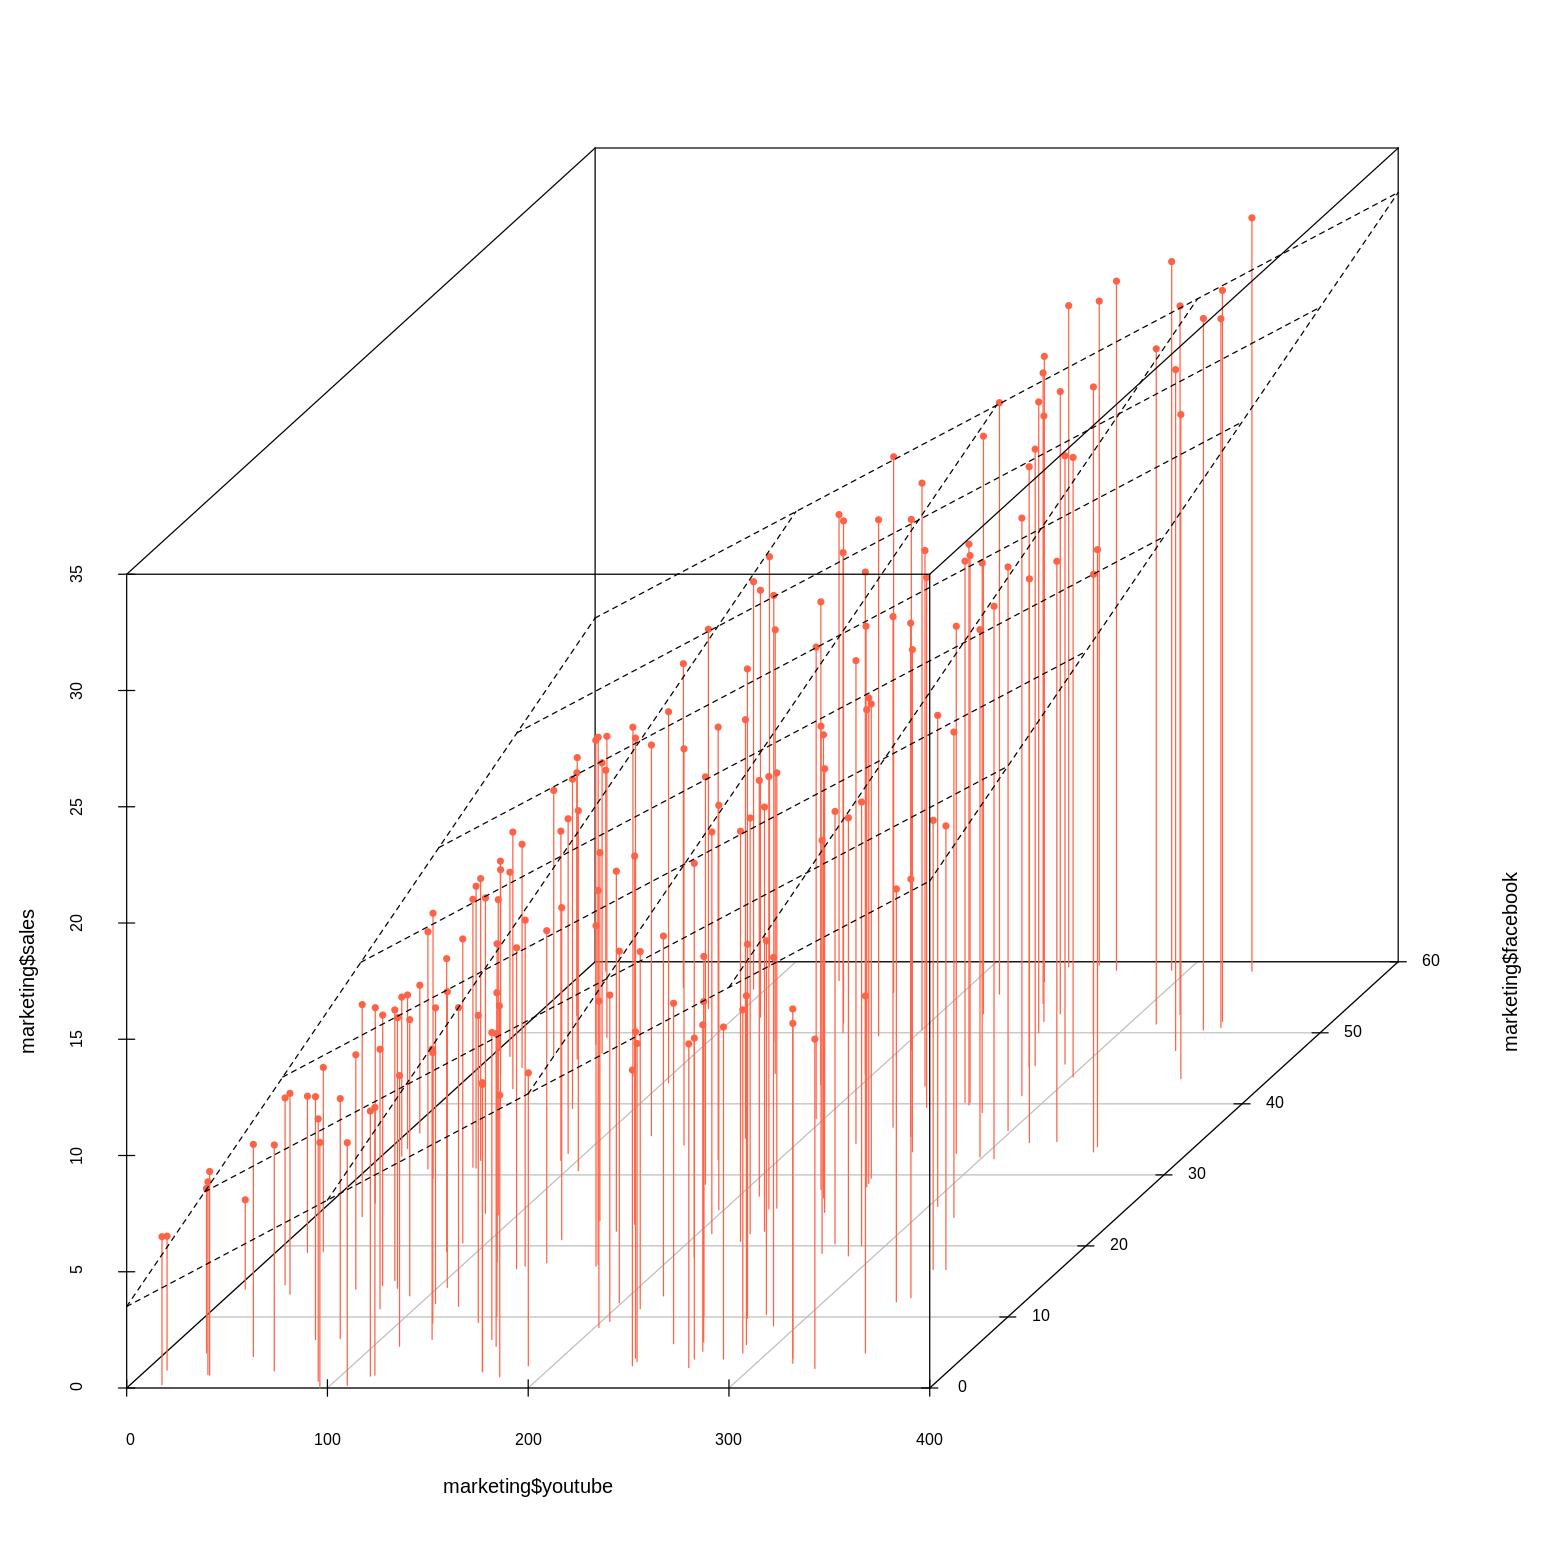

In [ ]:
# 3d 산점도
library(scatterplot3d)

s <- scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, pch = 20, type = 'h', angle = 55, color = "tomato")
s$plane3d(model_2)

* **예측**

In [ ]:
# test 데이터 생성
set.seed(51)
youtube_r <- sample(min(marketing$youtube):max(marketing$youtube), 60, replace = F)
facebook_r <- sample(min(marketing$facebook):max(marketing$facebook), 60, replace = F)

new_data <- tibble(youtube = youtube_r, facebook = facebook_r)
new_data

youtube,facebook
<dbl>,<int>
166.84,16
338.84,24
92.84,10
45.84,8
90.84,56
148.84,50
193.84,36
119.84,28
293.84,32


In [ ]:
# predict
sales_r <- predict(model_2, new_data)
new_data <- new_data %>% bind_cols(tibble(sales_predict = sales_r))
new_data %>% show()

# A tibble: 60 × 3
   youtube facebook sales_predict
     <dbl>    <int>         <dbl>
 1   167.        16         14.1 
 2   339.        24         23.5 
 3    92.8       10          9.63
 4    45.8        8          7.11
 5    90.8       56         18.2 
 6   149.        50         19.7 
 7   194.        36         19.1 
 8   120.        28         14.3 
 9   294.        32         23.0 
10   165.        43         19.1 
# … with 50 more rows


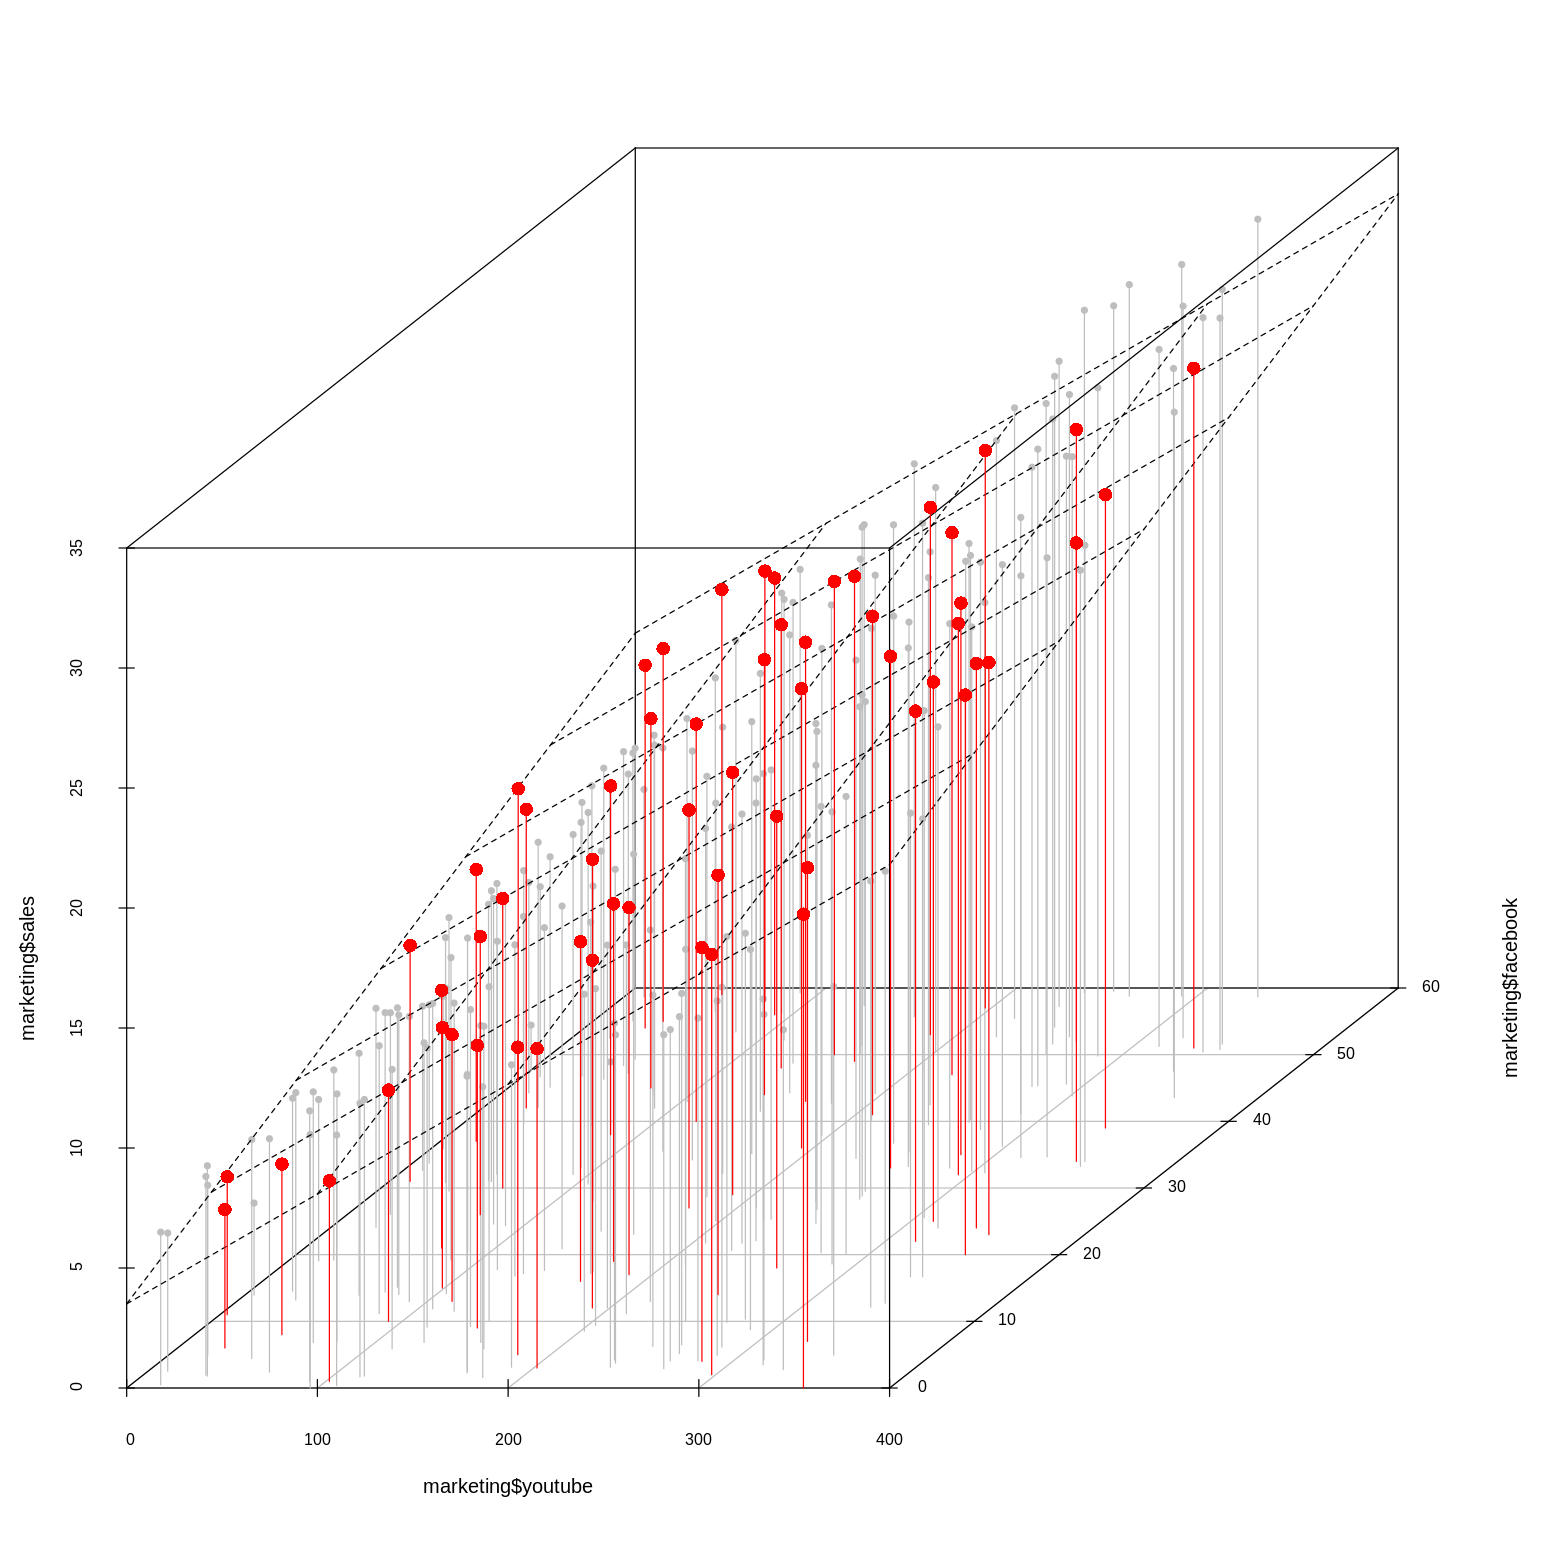

In [ ]:
# Add supplementary points
s <- scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, pch = 20, type = 'h', angle = 50, color = "grey")
s$plane3d(model_2)
s$points3d(new_data$youtube, new_data$facebook, new_data$sales_predict, col = "red", type = "h", pch = 16, cex = 1.5)

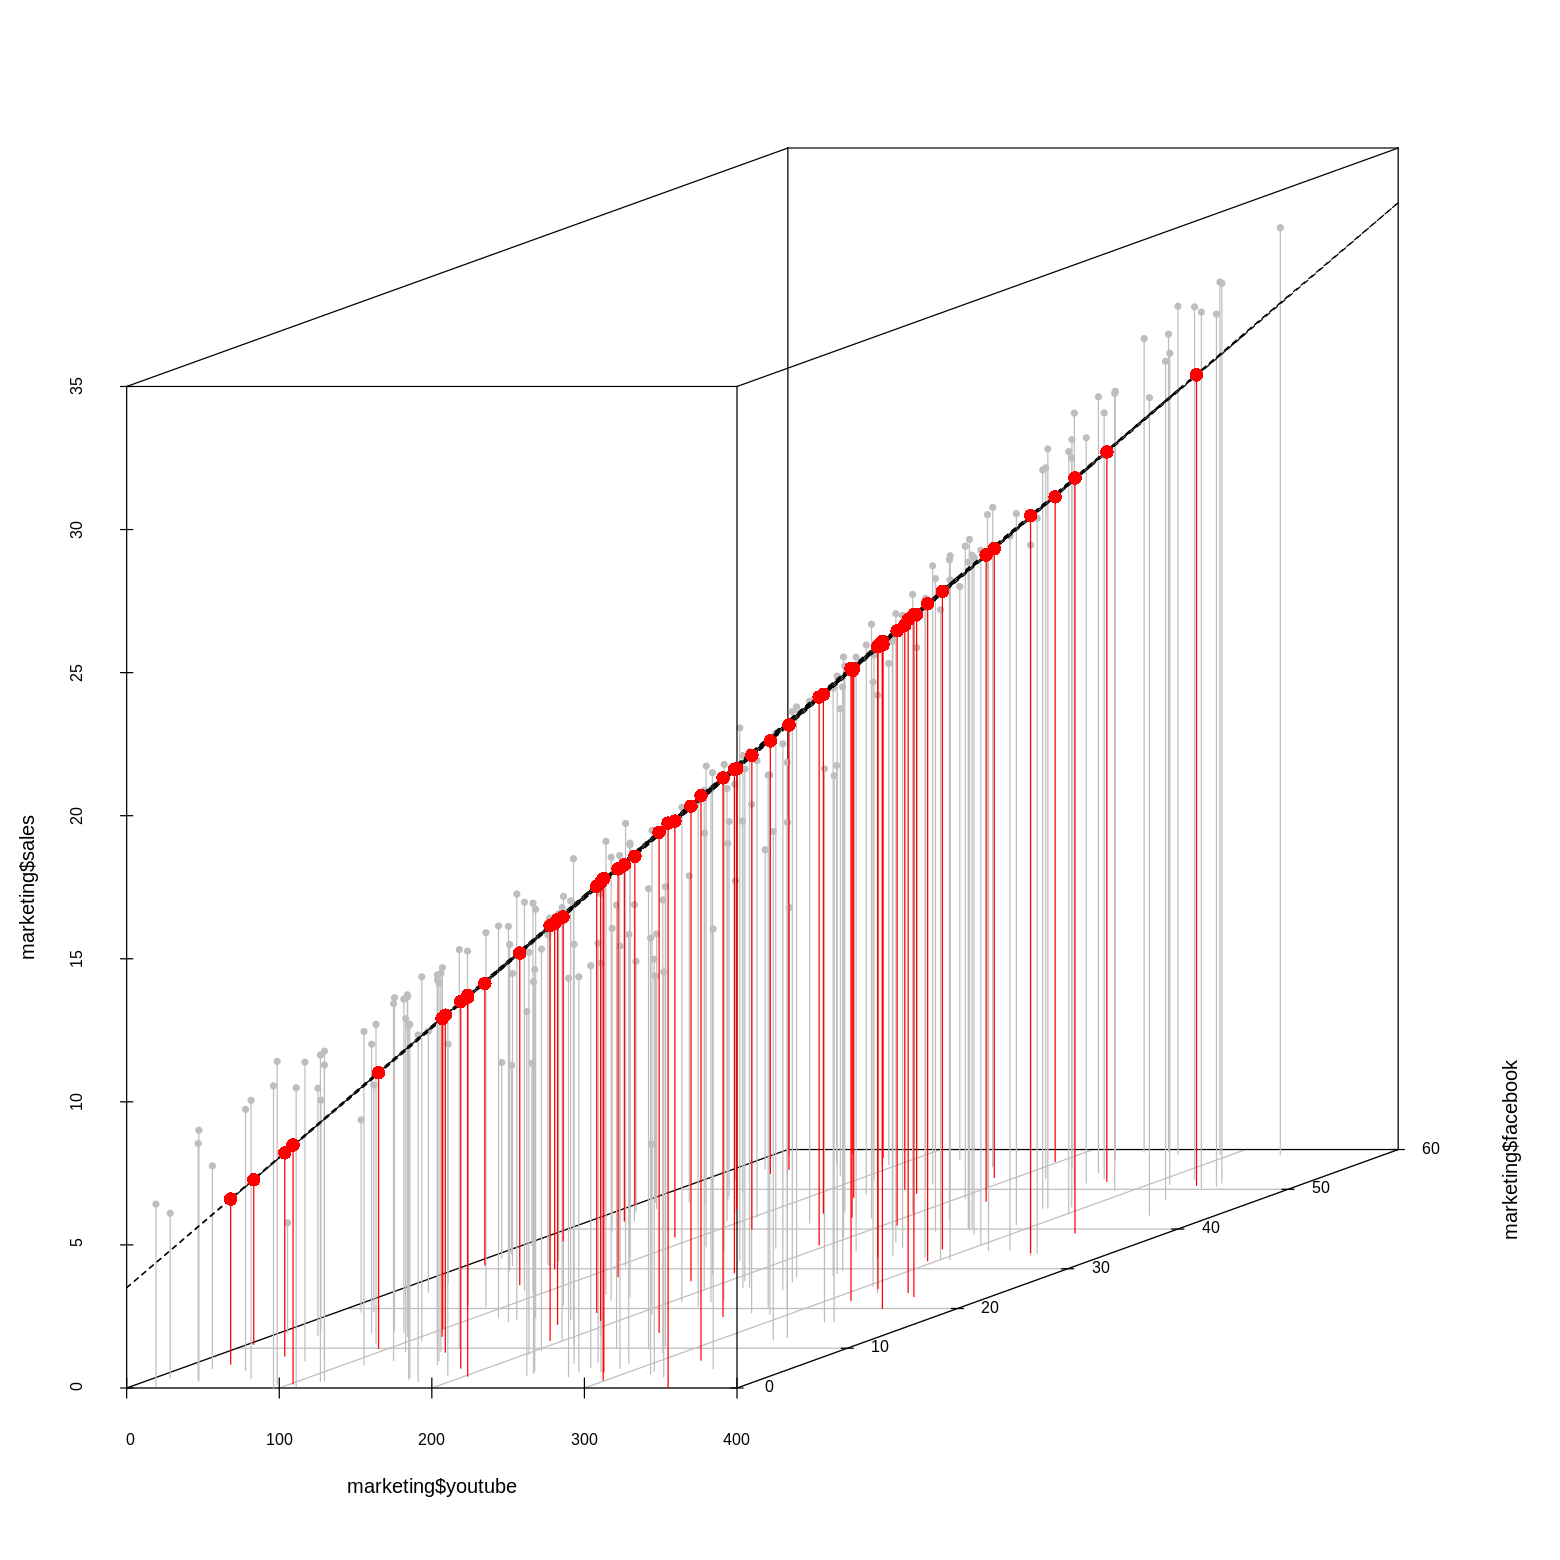

In [ ]:
s <- scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, pch = 20, type = 'h', angle = 25, color = "grey")
s$plane3d(model_2)
s$points3d(new_data$youtube, new_data$facebook, new_data$sales_predict, col = "red", type = "h", pch = 16, cex = 1.5)